<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Phase-encoded-mapping-/-Traveling-wave-/-Retinotopic-mapping" data-toc-modified-id="Phase-encoded-mapping-/-Traveling-wave-/-Retinotopic-mapping-1">Phase-encoded mapping / Traveling wave / Retinotopic mapping</a></span><ul class="toc-item"><li><span><a href="#Upsides" data-toc-modified-id="Upsides-1.1">Upsides</a></span></li><li><span><a href="#Downsides" data-toc-modified-id="Downsides-1.2">Downsides</a></span></li><li><span><a href="#Example-applications" data-toc-modified-id="Example-applications-1.3">Example applications</a></span></li><li><span><a href="#Relevance-to-other-analysis-techniques" data-toc-modified-id="Relevance-to-other-analysis-techniques-1.4">Relevance to other analysis techniques</a></span></li></ul></li><li><span><a href="#Relevant-resources/publications" data-toc-modified-id="Relevant-resources/publications-2">Relevant resources/publications</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-3">Simulation</a></span></li></ul></div>

# Phase-encoded mapping / Traveling wave / Retinotopic mapping
Phase-encoded mapping, aka retinotopic mapping or traveling wave, is a method used to retinotopically map the visual cortex.

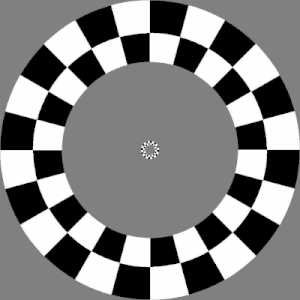
Expanding rings (for measuring eccentricity)

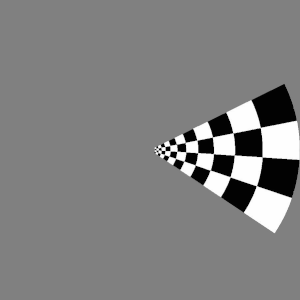
Rotating wedges (for measuring polar angle)

## Upsides

lorem

## Downsides
lorem

## Example applications
lorem

## Relevance to other analysis techniques
lorem

# Relevant resources/publications

* [Lecture from Nancy Kanwisher on retinotopic maps](https://www.youtube.com/watch?v=MhFJIgeY-ZY)
* [Lecture from Geoffrey Aguirre on Fourier transforms](https://www.youtube.com/watch?v=J1XYcIj86TI&t=4579s)
* Engel, S. A. (2012). The development and use of phase-encoded functional MRI designs. Neuroimage, 62(2), 1195-1200.
* Dougherty, R. F., Koch, V. M., Brewer, A. A., Fischer, B., Modersitzki, J., & Wandell, B. A. (2003). Visual field representations and locations of visual areas V1/2/3 in human visual cortex. Journal of vision, 3(10), 1-1.

# Simulation
First import the data and a few standard Python packages.

In [1]:
# general packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# pull data from GitHub
import requests, io
for array in ['voxel_by_timeseries','receptive_fields']:
    globals()['{}'.format(array)] = np.load(io.BytesIO(requests.get(
        'http://github.com/PaulScotti/fmriplayground/raw/main/methods/phase_encoded_mapping/{}.npy?raw=true'.format(array)).content),allow_pickle=True)
    
# change default plotting
plt.rcParams.update({'font.size': 18, 'figure.figsize': (7,2)})
    
# overview of the data
num_subjects = 1
num_voxels = voxel_by_timeseries.shape[0] #100 voxels
num_TRs = voxel_by_timeseries.shape[1] #180 TRs

In this simulated dataset we have 1 subject and 100 voxels and our aim will be to characterize the receptive field of each voxel in terms of preferred eccentricity. The series of voxels progresses from posterior to anterior visual cortex, meaning that theoretically we should expect that more anterior voxels represent eccentricities farther away from the fovea (see picture below which shows a representative retinotopic map for eccentricity [left] and polar angle [right]).


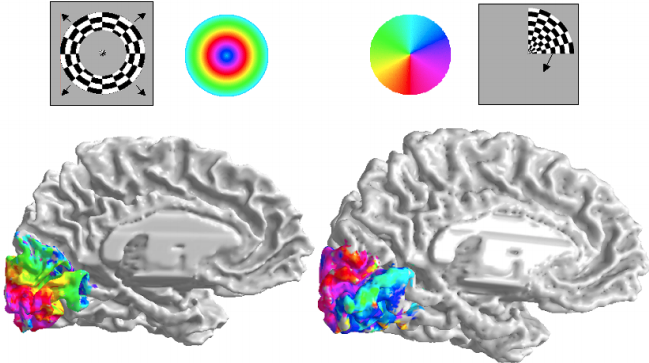
Dougherty et al. (2003)

The trial procedure for this simulated experiment was to present the expanding checkerboard pattern 10 times, with each iteration taking 10 seconds (with 1s TRs) expanding from 0-15 degrees of eccentricity.

Let's plot the first voxel's time series:


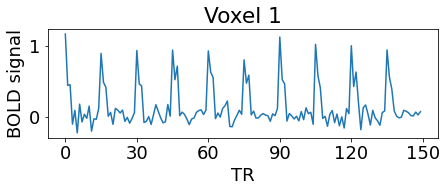

In [2]:
plt.plot(voxel_by_timeseries[0,:])
plt.xticks(np.arange(0,num_TRs+1,30))
plt.xlabel("TR")
plt.ylabel("BOLD signal")
plt.title("Voxel 1")
plt.show()

If this voxel was receptive to a certain eccentricity, then we should observe 10 repeated peaks throughout the experiment centered around when those eccentricities were presented. How do we quantify this? We can compare the voxel time series to a sine wave where the peaks of the sine wave repeatedly are centered at the same eccentricity. We can repeat this procedure for every eccentric angle (here, simply repeating it 15 times for every integer of eccentric angle) and see which correlation is the strongest.


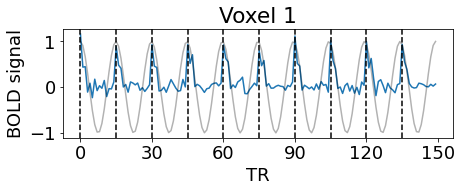

Correlation coefficient: 0.511


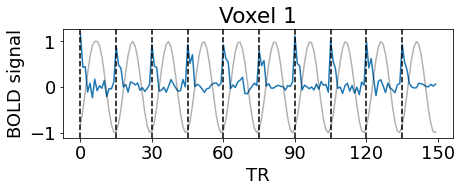

Correlation coefficient: -0.442


In [3]:
plt.plot(voxel_by_timeseries[0,:])
plt.xticks(np.arange(0,num_TRs+1,30))
for p in np.arange(0,num_TRs,15):
    plt.axvline(p,c='k',ls='--')
plt.plot(np.cos(np.linspace(0, np.pi*20, num_TRs)), c='k', alpha=.3)
plt.xlabel("TR")
plt.ylabel("BOLD signal")
plt.title("Voxel 1")
plt.show()

print("Correlation coefficient: {:.3f}".format(np.corrcoef(voxel_by_timeseries[0,:],np.cos(np.linspace(0, np.pi*20, num_TRs)))[0][1]))

plt.plot(voxel_by_timeseries[0,:])
plt.xticks(np.arange(0,num_TRs+1,30))
for p in np.arange(0,num_TRs,15):
    plt.axvline(p,c='k',ls='--')
plt.plot(np.roll(np.cos(np.linspace(0, np.pi*20, num_TRs)),7), c='k', alpha=.3)
plt.xlabel("TR")
plt.ylabel("BOLD signal")
plt.title("Voxel 1")
plt.show()

print("Correlation coefficient: {:.3f}".format(np.corrcoef(voxel_by_timeseries[0,:],np.roll(np.cos(np.linspace(0, np.pi*20, num_TRs)),7))[0][1]))

We can use the location of the sine wave with the highest correlation as the estimated preferred eccentricity for the voxel. Then, we repeat this process for every voxel and compare our estimated eccentricities to the actual receptive field eccentricites of the voxel (Note: we can only do this because this is simulated data. In real experiments you would not be able to compare predictions to actual receptive fields.)


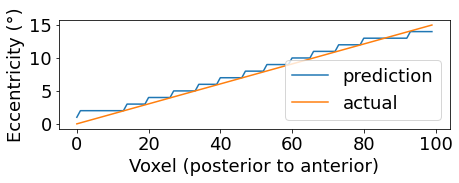

In [4]:
predicted_eccentricity = []
for v in range(num_voxels):
    rs = []
    for t in range(15):
        rs = np.append(rs, np.corrcoef(voxel_by_timeseries[v,:],np.roll(np.cos(np.linspace(0, np.pi*20, num_TRs)),t))[0][1])
    predicted_eccentricity = np.append(predicted_eccentricity, np.argmax(rs))

plt.plot(predicted_eccentricity, label='prediction')
plt.plot(receptive_fields, label='actual')
plt.xlabel("Voxel (posterior to anterior)")
plt.ylabel("Eccentricity (°)")
plt.yticks(np.arange(0,16,5))
plt.legend()
plt.show()

We can see from this plot that our theoretical knowledge that more anterior voxels (later voxels in the data) are associated with larger preferred eccentricities matches with our predictions from phase-encoded mapping.

Note that in practice one would also need to account for the hemodynamic delay (it takes approximately 5-15s for blood to flow to the target brain region and show itself in the BOLD signal) when estimating optimal phase, and also note that an alternative approach for phase-encoded mapping is to use Fourier transforms to estimate phase and amplitude voxel time series (see lecture clip from Geoffrey Aguirre in the resources section above).

In [1]:
## Code used to simulate the data instead of loading it from GitHub: ##
import numpy as np
from scipy.stats import gamma
np.random.seed(1)
num_voxels = 100
num_TRs = 15 * 10

gaussian_function = (gamma.pdf(np.arange(20),5) * gamma.pdf(np.arange(20),12)) / .2

eccentricities = np.tile(np.arange(15),10)
receptive_fields = np.linspace(0,15,num_voxels)

voxel_by_timeseries=np.full((num_voxels,num_TRs),np.nan)
for v,rec in enumerate(receptive_fields):
    for t,ecc in enumerate(eccentricities):
        voxel_by_timeseries[v,t] = 0
        if np.abs(rec-ecc) < 3:
            voxel_by_timeseries[v,t]+=1
        if np.abs(rec-ecc) < 1:
            voxel_by_timeseries[v,t]+=1
        
    noise = np.random.normal(0,.2,num_TRs)
    voxel_by_timeseries[v,:] = (voxel_by_timeseries[v,:] + noise) / np.max(voxel_by_timeseries[v,:])

np.save('voxel_by_timeseries.npy',voxel_by_timeseries)
np.save('receptive_fields.npy',receptive_fields)